# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [9]:
import numpy as np
import pylab as plt
import swyft
import torch

In [10]:
DEVICE = 'cuda:0'
NDIM = 6  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds

In [26]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    x = z
    n = np.random.randn(*x.shape)*sigma
    return x + n

In [27]:
z0 = np.ones(NDIM)*0.6
x0 = model(z0, sigma = 1e-6)
x0.shape

(6,)

In [28]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [29]:
for i in range(NROUNDS):
    sw.round(n_sims = 3000, n_train = [300,300,300], lr = [1e-3,1e-4,1e-5], n_batch = 64, p = 0.0)

  2%|▏         | 5/300 [00:00<00:06, 46.03it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)
Network optimization


100%|██████████| 300/300 [00:06<00:00, 45.74it/s]


In [30]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

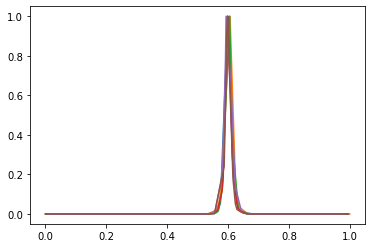

In [31]:
for i in range(NROUNDS):
    for j in range(NDIM):
        plt.plot(post[i][j]['z'], np.exp(post[i][j]['lnL']), label=i)
        #plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
#plt.legend()
#plt.xlim([0.45, 0.55])
#plt.ylim([-5, 0])